In [1]:
#classification algorithm : SVM : support vector machine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
#To load dataset mobile_1.csv
df=pd.read_csv("mobile_1.csv")
#to display first 5 records
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            0  
1        1             1     0            1  
2        1             1     0            1  
3        1             0     0            1  
4        1             1     0            0  

[5 rows x 21 columns]

In [ ]:
#>=50000 then 1
#<50000 then 0

In [ ]:
#Problem case study : - 
''' Basically company wants to launch their smart phone into the market , But they want to take 
a decision  whether they should keep the price more than 50000 or less than 50000 / - then It is 
the premium phone and it is less than 50000 than it is the normal phone .'''

#here target variable:  price_range  Whether the phone is premium means
#price_range>50000 or normal phone means price_range<50000 so that my target
#price_range=0 means <50000 and price_range=1 means >50000

In [7]:
#step 1 : to check null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

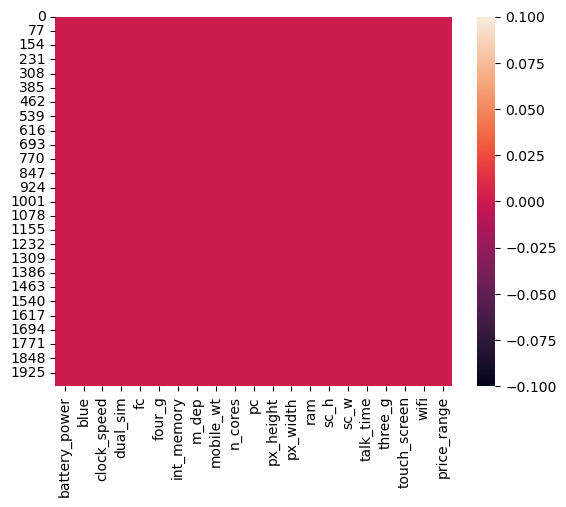

In [6]:
#visualisation 
sns.heatmap(df.isnull())
plt.show()

In [8]:
#cross check
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
#To check duplicates records
df.duplicated().sum()

0

In [10]:
#.select input and output from given dataset
X=df.drop("price_range",axis=1) #input
Y=df["price_range"] #output

In [11]:
#How many samples of 0's and 1's in price_range column
df["price_range"].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

In [12]:
df.shape

(2000, 21)

In [13]:
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [14]:
#70% training and 30% testing 
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
#Apply Standard scaler for X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [16]:
type(X_train)

numpy.ndarray

In [17]:
X_train

array([[ 0.12296692, -1.00142959,  1.58033471, ..., -1.73867435,
         0.98722446,  1.00286124],
       [ 0.6169352 , -1.00142959,  1.70309277, ..., -1.73867435,
         0.98722446,  1.00286124],
       [-0.21936458,  0.99857245,  1.45757665, ...,  0.57515083,
         0.98722446, -0.99714693],
       ...,
       [-1.2118962 ,  0.99857245,  0.10723794, ...,  0.57515083,
         0.98722446,  1.00286124],
       [ 0.63761294,  0.99857245,  0.35275407, ...,  0.57515083,
         0.98722446, -0.99714693],
       [ 0.63531542,  0.99857245, -0.99758464, ...,  0.57515083,
        -1.01294087,  1.00286124]])

In [18]:
#Create user defined function
def create_model(model): #here model passing argument(object)
    model.fit(X_train,Y_train)#train the model with 70%data
    #to test the model with 30% data
    Y_pred=model.predict(X_test)
    #to generate report and confusion matrix
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#1.LogisticRegression
#2.DecisionTreeClassifier
#3. Pruning technique
#A.max_depth
#B. min_sample_leaf
#4.RandomForestClassifer
#5.ADA Boost
#6. Gradient Boost
#7. Extreme Gradient Boost

In [20]:
#8. Apply Support vector machine (SVM)
#1. Linear Kernel function 
#suppose both classes are linearly separate by straight line 
#use inbuilt class : LinearSVC
#LinearSVC means linear support vector classifier class
from sklearn.svm import LinearSVC

In [21]:
#create object of class LinearSVC
svc=LinearSVC(random_state=1)

In [22]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       284
           1       0.98      0.99      0.98       316

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

[[277   7]
 [  4 312]]
